In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Load the CSV data into a DataFrame
csv_path = 'basin_similarity.csv'
df = pd.read_csv(csv_path)

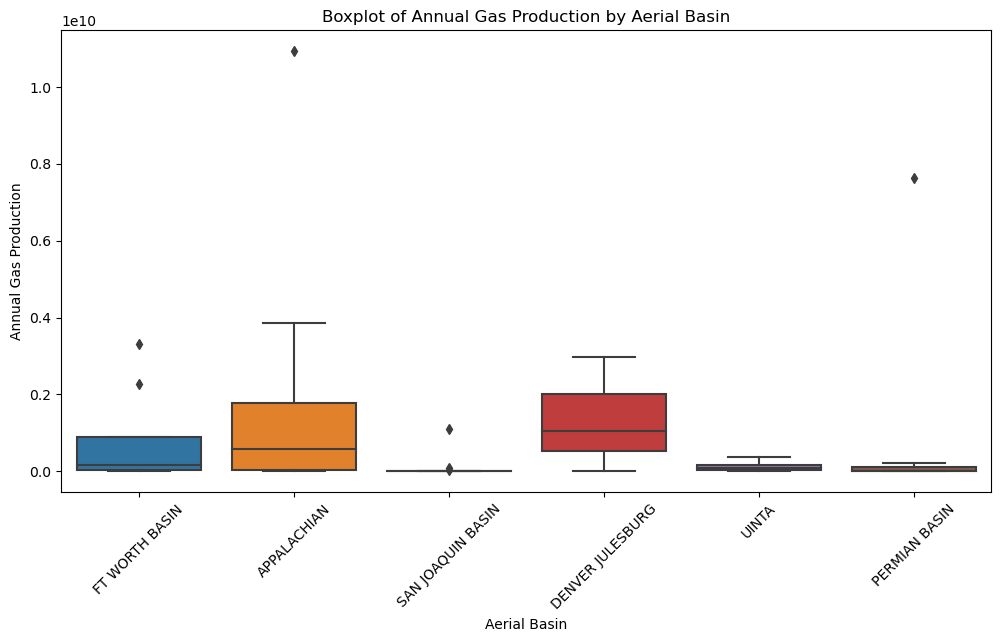

In [9]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(x='Aerial_basin', y='annual_gas', data=df)

# Set plot titles and labels for clarity
plt.title('Boxplot of Annual Gas Production by Aerial Basin')
plt.xlabel('Aerial Basin')
plt.ylabel('Annual Gas Production')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [1]:
# Correcting the palette name and retrying the faceted plot
g = sns.FacetGrid(df_normalized_long, col='Measurement', col_wrap=2, sharey=False, height=5, aspect=1)
g.map(sns.boxplot, 'Aerial_basin', 'Normalized Value', palette='viridis')

# Adjustments for readability
g.set_xticklabels(rotation=45)
g.set_titles('{col_name}')
g.fig.suptitle('Normalized Measurements by Aerial Basin (Faceted 2x2)', y=1.03)

# Show the plot
plt.show()


NameError: name 'sns' is not defined

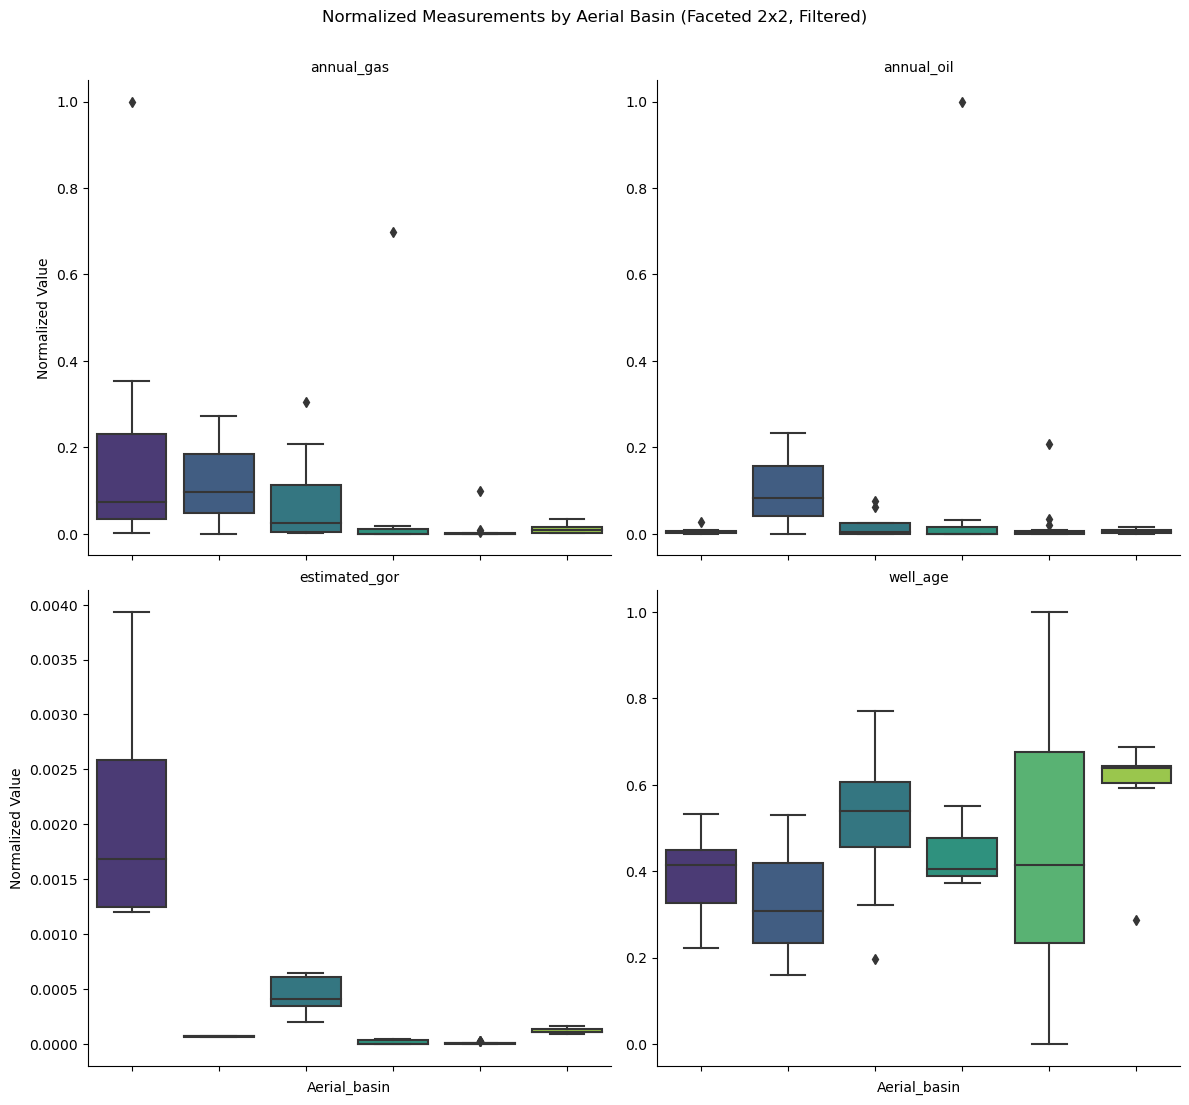

In [16]:
# Selecting the columns to be normalized
columns_to_normalize = ['annual_gas',
                        'annual_oil', 'estimated_gor', 'well_age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns and update the dataframe
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(
    df[columns_to_normalize])

# Calculate the IQR for 'estimated_gor'
Q1 = df_normalized['estimated_gor'].quantile(0.25)
Q3 = df_normalized['estimated_gor'].quantile(0.75)
IQR = Q3 - Q1

# Define the thresholds for outliers
# lower_bound = Q1 - 5 * IQR
# upper_bound = Q3 + 5 * IQR
lower_bound = float("-inf")
upper_bound = 0.12

# Filter out the outliers from 'estimated_gor'
df_filtered = df_normalized[(df_normalized['estimated_gor'] >= lower_bound) & (
    df_normalized['estimated_gor'] <= upper_bound)]

# Reshape the filtered dataframe to long format for plotting
df_filtered_long = pd.melt(df_filtered, id_vars=['Aerial_basin'], value_vars=columns_to_normalize,
                           var_name='Measurement', value_name='Normalized Value')

# Plotting the filtered data in a faceted 2x2 layout
g_filtered = sns.FacetGrid(
    df_filtered_long, col='Measurement', col_wrap=2, sharey=False, height=6, aspect=1)
g_filtered.map(sns.boxplot, 'Aerial_basin', 'Normalized Value',
               palette='viridis', order=sorted(df_filtered['Aerial_basin'].unique()))

# Adjustments for readability
g_filtered.set_xticklabels(rotation=45)
g_filtered.set_titles('{col_name}')

# This adjustment ensures that the x-axis labels are not cut off
plt.gcf().subplots_adjust(bottom=0.15)

g_filtered.fig.suptitle(
    'Normalized Measurements by Aerial Basin (Faceted 2x2, Filtered)', y=1.03)

# Show the updated plot
plt.show()


In [17]:
sorted(df_filtered['Aerial_basin'].unique())

['APPALACHIAN',
 'DENVER JULESBURG',
 'FT WORTH BASIN',
 'PERMIAN BASIN',
 'SAN JOAQUIN BASIN',
 'UINTA']